In [ ]:
# Expectation Maximization
# Determine maximum likelihood of an event given variables that are inferred/not directly recorded

In [31]:
# Imports
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns # used to plot statistical data in matplotlib
import numpy as np
import pandas as pd
from math import sqrt, log, exp, pi
from scipy import stats # normalization and probability density functions
from random import uniform # output a random value in between two specified values
sns.set_style("white")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


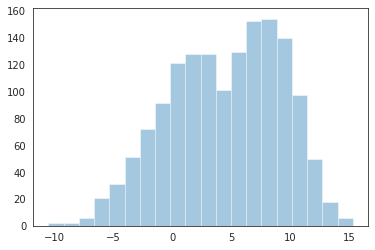

In [36]:
# Visualize Data
# Get random data points from a nomralized probability function 
random_seed=36788765
np.random.seed(random_seed)
Mean1 = 2.0 
Mean2 = 9.0  
StandardDev1 = 4.0
StandardDev2 = 2.0 
y1 = np.random.normal(Mean1, StandardDev1, 1000)
y2 = np.random.normal(Mean2, StandardDev2, 500)
data = np.append(y1, y2)

# Graph
# Distplot is matplotlib's histogram function, but modified a bit
x = np.linspace(min(data), max(data), 2000) 
sns.distplot(data, bins = 20, kde = False); 

In [37]:
# Practice Writing a Probability Distribution (aka Gaussian) Function EQU
# Notes:
  # mu = mean
  # sigma = standard deviation

class Gaussian:
    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma
    def pdf(self, x):
        u = (x - self.mu) / abs(self.sigma)
        y = (1/(sqrt(2*pi)*abs(self.sigma))) * exp(-u * u / 2)
        return y
    def __repr__(self):
        return 'Gaussian({0:4.6}, {1:4.6})'.format(self.mu, self.sigma)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


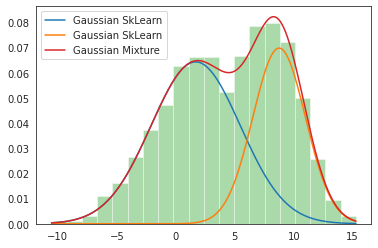

In [39]:
# Visualize Gaussians with Data
# Notes:
  # Gaussian Mixture iterates between ESteps and MSteps
  # EStep = determine probability that a latent variable belongs to a pdf
  # MStep = update paramters of pdfs so as to reflect the data better 
  # score_samples() = a method that computes log likelihood of each data point
  # reshape(-1, 1) = "I want the data fit into x number of rows that numpy will determine for me and 1 column"

gaussianMixtureModel = GaussianMixture(n_components = 2, tol = 0.000001)
gaussianMixtureModel.fit(np.expand_dims(data, 1))
for mu, sd, weights in zip(gaussianMixtureModel.means_.flatten(), np.sqrt(gaussianMixtureModel.covariances_.flatten()), gaussianMixtureModel.weights_):
    gaussianSkLearn = stats.norm(mu, sd).pdf(x) * weights
    plt.plot(x, gaussianSkLearn, label = 'Gaussian SkLearn');
sns.distplot(data, bins = 20, kde = False, norm_hist = True)
gaussianMixtureModelSum = np.exp([gaussianMixtureModel.score_samples(e.reshape(-1, 1)) for e in x])
plt.plot(x, gaussianMixtureModelSum, label = 'Gaussian Mixture');
plt.legend();
